<a href="https://colab.research.google.com/github/Jakub-Ner/triangulation/blob/main/traingulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/home/jakubner/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


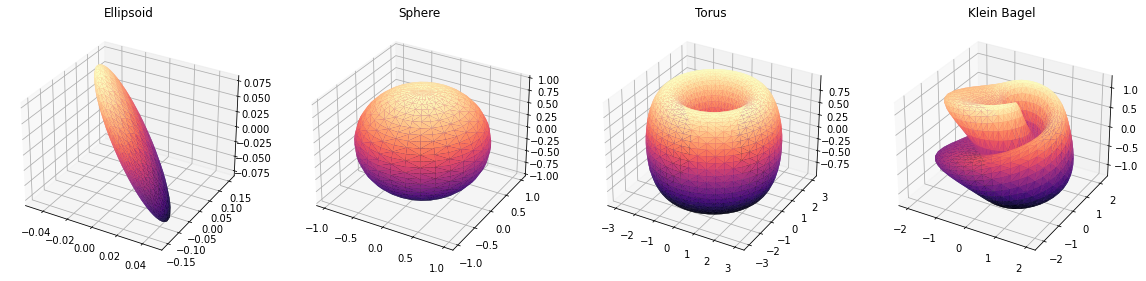

In [1]:
import numpy as np
from scipy.spatial import Delaunay, ConvexHull
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(1, 4, subplot_kw={"projection": "3d"}, figsize=(20, 20))

def triangulateFunctionGraph(ax, XYZ, cmap=cm.magma):
    tri = Delaunay(XYZ[:,:2])
    ax.plot_trisurf(
        XYZ[:,0], XYZ[:,1], XYZ[:,2],
        triangles=tri.simplices, cmap=cmap
    )

def readFace(file):
    with open(file, 'r') as vertices:
        return np.array([
            [float(v) for v in line.split()]
            for line in vertices
        ])
            
def triangulateSphere(ax, k=30, cmap=cm.magma):
  
    # domain parametrization
    U = np.linspace(0, 2 * np.pi, k)
    V = np.linspace(0, np.pi, k)
    [X, Y] = np.meshgrid(U, V)

    # sphere parametrization
    S1 = np.cos(X) * np.sin(Y)
    S2 = np.sin(X) * np.sin(Y)
    S3 = np.cos(Y)

    # triangulate the points in [0,2pi] x [0,pi]
    tri = Delaunay(np.array([X.flatten(), Y.flatten()]).T)
    
    # plot the sphere
    ax.plot_trisurf(
        S1.flatten(), S2.flatten(), S3.flatten(),
        triangles=tri.simplices,
        cmap=cmap
    )

def triangulateEllipsoid(ax, A, k=30,cmap=cm.magma):
    
    # domain parametrization
    U = np.linspace(0, 2 * np.pi, k)
    V = np.linspace(0, np.pi, k)
    [X, Y] = np.meshgrid(U, V)

    # sphere parametrization
    S1 = np.cos(X) * np.sin(Y)
    S2 = np.sin(X) * np.sin(Y)
    S3 = np.cos(Y)

    # map sphere to elipsoid
    E1 = np.zeros((k,k))
    E2 = np.zeros((k,k))
    E3 = np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            xyz = np.array([S1[i,j], S2[i,j], S3[i,j]])
            [E1[i,j], E2[i,j], E3[i,j]] = A @ xyz

    # triangulate the points in [0,2pi] x [0,pi]
    tri = Delaunay(np.array([X.flatten(), Y.flatten()]).T)
    
    # plot the elipsoid
    ax.plot_trisurf(
        E1.flatten(), E2.flatten(), E3.flatten(),
        triangles=tri.simplices, cmap=cmap
    )

def triangulateSurface(ax, f, u, v, k=30, cmap=cm.magma):

    # domain parametrization
    U = np.linspace(*u)
    V = np.linspace(*v)
    [X, Y] = np.meshgrid(U, V)

    # surface parametrization
    f1, f2, f3 = f
    S1 = f1(X, Y)
    S2 = f2(X, Y)
    S3 = f3(X, Y)

    # triangulate the points in [u1, u2] x [v1, v2]
    tri = Delaunay(np.array([X.flatten(), Y.flatten()]).T)

    # plot the surface
    ax.plot_trisurf(
        S1.flatten(), S2.flatten(), S3.flatten(),
        triangles=tri.simplices,
        cmap=cmap
    )

A = np.array([
    [-0.01289453, -0.02087514,  0.04109751],
    [-0.00261222, -0.01984956, -0.15409974],
    [-0.00431062,  0.07447336, -0.0295528 ]
])

torus = lambda a, b: (
    lambda x, y: (a * np.cos(y) + b) * np.cos(x),
    lambda x, y: (a * np.cos(y) + b) * np.sin(x),
    lambda x, y: a * np.sin(y)
)

kleinBagel = lambda r: (
    lambda x, y: (r + np.cos(x/2) * np.sin(y) - np.sin(x/2) * np.sin(2*y)) * np.cos(x),
    lambda x, y: (r + np.cos(x/2) * np.sin(y) - np.sin(x/2) * np.sin(2*y)) * np.sin(x),
    lambda x, y: np.sin(x/2) * np.sin(y) + np.cos(x/2) * np.sin(2*y)
)

triangulateEllipsoid(ax[0], A)
ax[0].set_title('Ellipsoid')
triangulateSphere(ax[1])
ax[1].set_title('Sphere')
triangulateSurface(ax[2], torus(1, 2), (0,2*np.pi), (0,2*np.pi))
ax[2].set_title('Torus')
triangulateSurface(ax[3], kleinBagel(1), (0,2*np.pi), (0,2*np.pi))
ax[3].set_title('Klein Bagel')

plt.show()



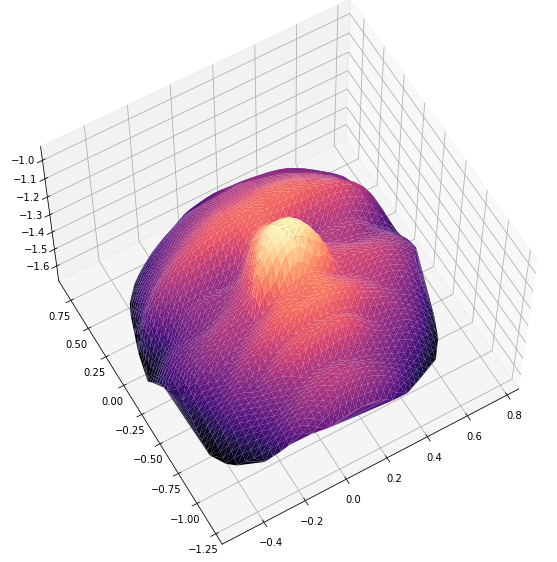

In [2]:
ax = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')
xyz = readFace('face.vert')
ax.view_init(elev=60, azim=-120) 
triangulateFunctionGraph(ax, xyz)
plt.show()

Smoothed face

In [3]:
tri = Delaunay(xyz[:,:2])
new_points = np.empty((tri.simplices.shape[0]*3, xyz.shape[1]))

i = 0
for a, b, c in tri.simplices:
    new_points[i] = (xyz[a] + xyz[b])/2
    new_points[i+1] = (xyz[b] + xyz[c])/2
    new_points[i+2] = (xyz[c] + xyz[a])/2
    i += 3
smothed_xyz = np.concatenate((xyz, new_points), axis=0)


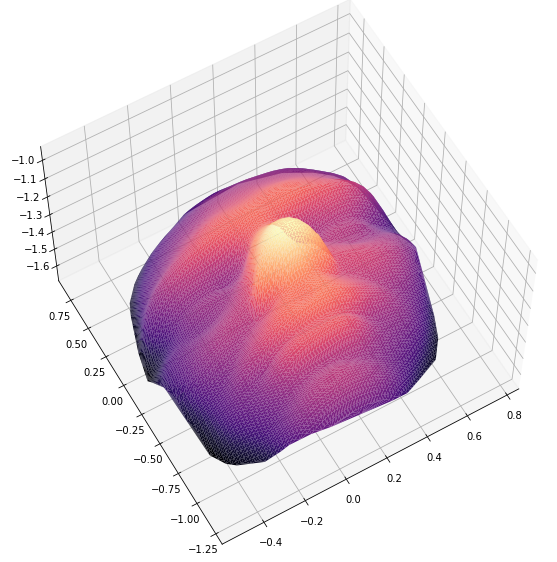

In [4]:
ax = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')
xyz = readFace('face.vert')
ax.view_init(elev=60, azim=-120) 
triangulateFunctionGraph(ax, smothed_xyz)
plt.show()